In [16]:
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import make_interp_spline 
import matplotlib.pyplot as plt
from collections import defaultdict

font_path = "/Users/ys/Library/Fonts/Cambria.ttf"
font = matplotlib.font_manager.FontProperties(fname=font_path)

#! 根据模型修改
# ppi, ppi-woppm, rnn, rnn-woppm
model_name = "ppi"

In [17]:
results_dir = f"./results/{model_name}"
values = defaultdict(list)
errors = defaultdict(list)
mins = defaultdict(list)
maxs = defaultdict(list)
layers_num = len(os.listdir(results_dir))
for fn in ['emb'] + list(range(layers_num-1)):
    lines = open(os.path.join(results_dir, f"{str(fn)}"+".eval"), "r").readlines()
    for line in lines:
        orga, avg, stdev, _min, _max = line.strip().split()
        values[orga].append(float(avg))
        errors[orga].append(float(stdev))
        mins[orga].append(float(_min))
        maxs[orga].append(float(_max))

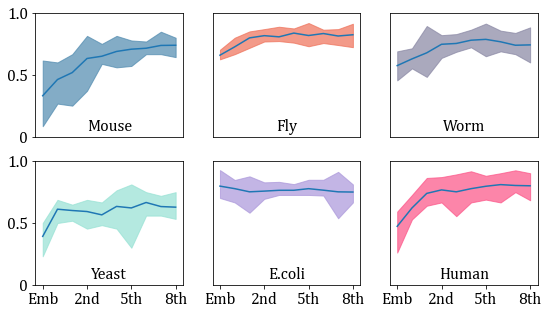

In [18]:
species = ['mouse', 'fly', 'worm', 'yeast', 'ecoli', 'human']
titles = ['Mouse', 'Fly', 'Worm', 'Yeast', 'E.coli', 'Human']
fill_colors = ["#4e89ae", "#ee6f57", "#8785a2", "#95e1d3", "#aa96da", "#fc5185"]

xs = list(range(1, 11))[: layers_num]
xticks = ["Emb", "Proj", "1th", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]
xticks = xticks[: layers_num]
xlim = layers_num + 0.5
xcords = [xs[i] for i in range(0, len(xs), 3)]
xticks = [xticks[i] for i in range(0, len(xs), 3)]

# fig, subs = plt.subplots(1, 2, figsize=(10, 5))
# plt.figure(figsize=(8, 5))
fig, subs = plt.subplots(2, 3, figsize=(9, 5))

for idx, orga in enumerate(species):
    row = idx // 3
    col = idx % 3
    subs[row, col].set_xlim(0.5, xlim, 1)
    if row == 1:
        # subs[row, col].set_xlabel("layer")
        subs[row, col].set_xticks(xcords, xticks, fontproperties=font, size=16)
    else:
        subs[row, col].xaxis.set_visible(False)

    subs[row, col].set_ylim(0, 1.0)
    if col == 0:
        # subs[row, col].set_ylabel("F1 Score", fontproperties=font)
        subs[row, col].set_yticks([0, 0.5, 1.0], [0, 0.5, 1.0], fontproperties=font, size=16)
    else:
        subs[row, col].yaxis.set_visible(False)
    subs[row, col].set_title(titles[idx], fontproperties=font, size=16, y=0)

    f1 = np.array(values[orga])
    error = np.array(errors[orga])
    _min = np.array(mins[orga])
    _max = np.array(maxs[orga])

    # xnew = np.linspace(1, layers_num, 100)
    # smooth = make_interp_spline(xs, f1)(xnew)
    # min_smooth = make_interp_spline(xs, _min)(xnew)
    # max_smooth = make_interp_spline(xs, _max)(xnew)

    # subs[row, col].fill_between(xnew, min_smooth, max_smooth, alpha=0.6, color=fill_colors[idx])
    # subs[row, col].plot(xnew, smooth)

    subs[row, col].fill_between(xs, mins[orga], maxs[orga], alpha=0.7, color=fill_colors[idx])
    subs[row, col].plot(xs, f1)

    
plt.savefig(f"./layers-{model_name}.pdf", bbox_inches='tight')